In [4]:
import matplotlib
from matplotlib import pyplot as plt
import random
import cmath
import math 

In [5]:
# Left- Of Query function
def leftOf(a, b, c): # the three coordinates have x and y coordinates
    val = (b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0]) # computing the cross product of the third component
    if val > 0:
        return True # if the value is postive, the point c is left of the ab
    else:
        return False

In [6]:
def findAngle(a,b):
    val = math.degrees(math.atan2(b[1]-a[1], b[0]-a[0]) - math.atan2(a[1]-a[1],(a[0]-1)-a[0]))
    return val * -1

In [7]:
def sortPoints(points):
    for i in range(1,len(points)):
        for j in range(i+1, len(points)):
            if (findAngle(points[0],points[i]) < findAngle(points[0], points[j])):
                points[i],points[j] = points[j], points[i]
    return points

In [8]:
def nextToTop(S):
    return S[-2]

In [2]:
def GrahamScanAlg():
    size = random.randint(3, 20)
    coordinates = []
    for i in range(size):
        coordinates.append([random.randint(0, 30), random.randint(0, 30)])
    print(coordinates)
    ancCor = 0
    for i in range(1,len(coordinates)):
        if (coordinates[i][1] == coordinates[ancCor][1]):
            if (coordinates[i][0] < coordinates[ancCor][0]):
                ancCor = i
        if (coordinates[i][1] < coordinates[ancCor][1]):
            ancCor = i
    #print(ancCor)  
    # Swap the point with the lowest y-coordinate with the first point
    coordinates[0],coordinates[ancCor] = coordinates[ancCor],coordinates[0]
    #print(coordinates)
    # sort the points based on the angle about the anchor
    sortPoints(coordinates)
    #testing - works
    for i in range(len(coordinates)):
        print(findAngle(coordinates[0],coordinates[i]))
    # creating the actual hull
    hull = []
    hull.append(coordinates[0])
    hull.append(coordinates[1])
    hull.append(coordinates[2])
  
    # Go through the remaining n-3 points
    for i in range(3, len(coordinates)):
        
        # Keep removing top while the angle formed by
        # points next-to-top, top, and coordinates[i] makes
        # a right turn
        while ((len(coordinates) > 1) and
        (not(leftOf(nextToTop(hull), hull[-1], coordinates[i])))):
            hull.pop()
        hull.append(coordinates[i])
    print(hull)
        
    plotPoints(coordinates)
        
    plotPoints(hull)

In [3]:
def plotPoints(points):
    x = []
    y = []
    for i in range(len(points)):
        x.append(points[i][0])
        y.append(points[i][1])
    x.append(points[-1][0])
    y.append(points[-1][1])
    x.append(points[0][0])
    y.append(points[0][1])
    plt.plot(x, y, color='green', marker='o', markerfacecolor='blue', markersize=10)
  
    plt.show()

[[21, 1], [23, 29], [15, 19], [15, 26], [27, 12], [27, 27], [13, 1], [17, 18], [6, 12], [27, 24], [16, 12], [7, 19], [1, 10], [17, 9], [23, 13]]
180.0
180.0
141.84277341263095
129.80557109226518
121.32869286780416
118.30075576600638
116.56505117707799
109.6538240580533
105.25511870305778
103.2405199151872
96.3401917459099
94.57392125990086
71.56505117707798
57.52880770915151
36.86989764584401
[[13, 1], [21, 1], [27, 12], [27, 27], [23, 29], [15, 26], [7, 19], [1, 10]]


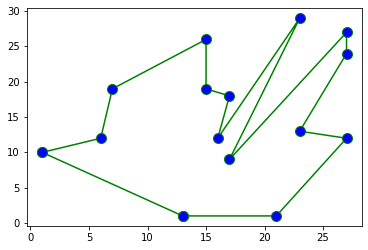

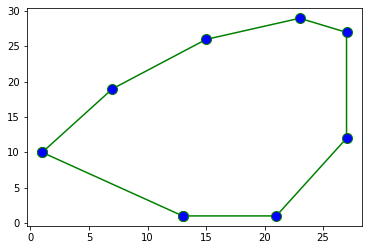

In [9]:
GrahamScanAlg()

[[23, 23], [14, 8], [22, 17]]
180.0
131.63353933657018
120.96375653207352
[[14, 8], [22, 17], [23, 23]]


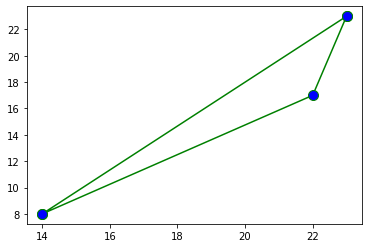

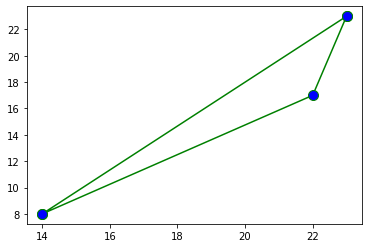

In [10]:
GrahamScanAlg()